<a href="https://colab.research.google.com/github/Hlamulo1/Research-/blob/main/Malware_Centralized_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the malware dataset. <br/>
Malware Dataset:https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz <br/>
<br/>
* 41,323 binaries (exe ,dll) - legitimate
* 96,724 malware files from virusshare.com


In [ ]:
!pip install pandas



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/MalwareData'


/content/drive/My Drive/MalwareData


In [ ]:
!ls


MalwareData.csv


In [ ]:
import pandas as pd

file_path = 'MalwareData.csv'



In [ ]:
malData = pd.read_csv(file_path, sep='|', low_memory=True)

In [ ]:
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
malData.shape

(138047, 57)

In [ ]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
legit= malData[0:41323].drop(["legitimate"], axis=1)
mal= malData[41323::].drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


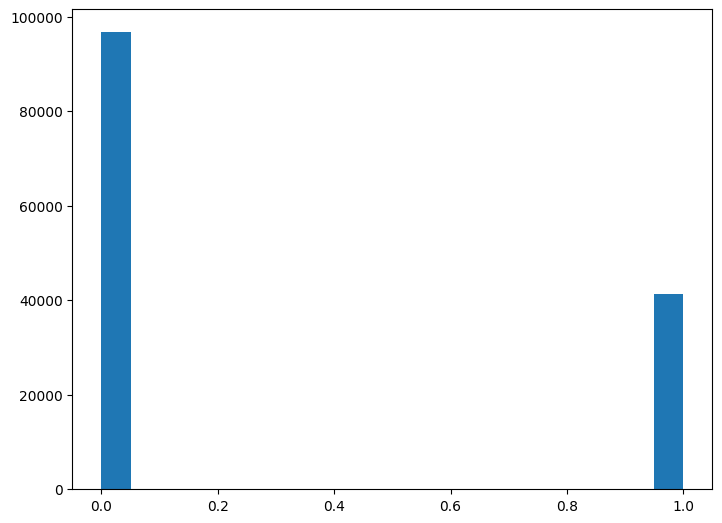

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
plt.show()

# Data Cleaning

In [ ]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [ ]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variables are removed successfully")

 The Name and md5 variables are removed successfully


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(malData, y)
# X_new.shape

# Spliting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(110437, 54)

# Model Building </br> </br>
## 1- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)



## Random forest Evaluation on test data

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix



In [ ]:

from sklearn.metrics import confusion_matrix

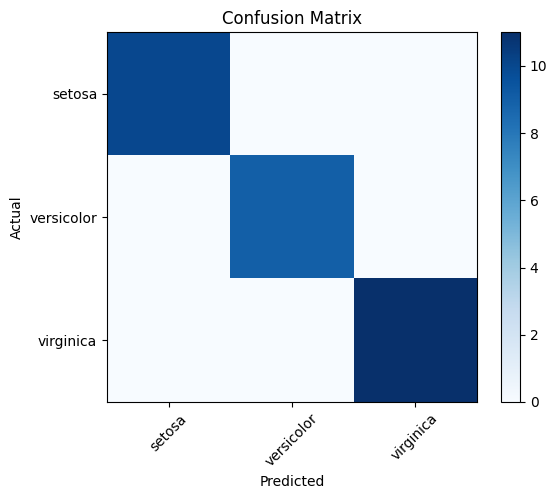

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load a sample dataset (replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (replace this with your own classifier)
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using matplotlib
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9828318407780001

In [ ]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.9838102136906918

In [ ]:
f1_score(y_test, prediction)

0.9730933606212002

## Confusion matrix

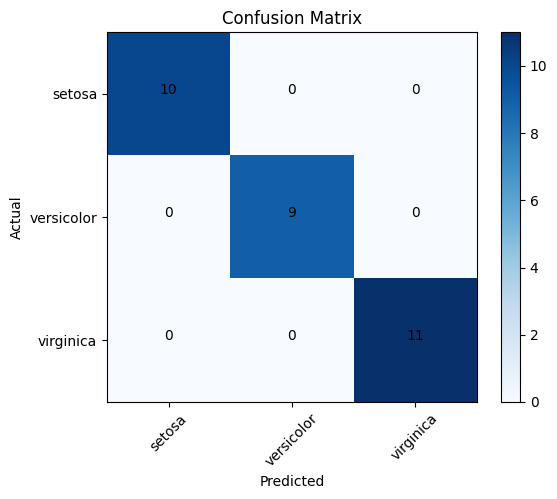

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load a sample dataset (replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (replace this with your own classifier)
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using matplotlib
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add values to the cells of the confusion matrix
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, str(confusion[i, j]), horizontalalignment="center", color="black")

plt.show()


In [ ]:
import os
import keras
import numpy as np
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

## 2 - logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

logModel=clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [ ]:
# Accuracy on the train dataset

train_log= logModel.predict(X_train)

accuracy_score(y_train,train_log)



0.7015221347917817

In [ ]:
# Accuracy on the test dataset

pred=logModel.predict(X_test)

accuracy_score(y_test,pred)


0.6972111553784861

In [ ]:
f1_score(y_test, pred)


0.0

## Confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


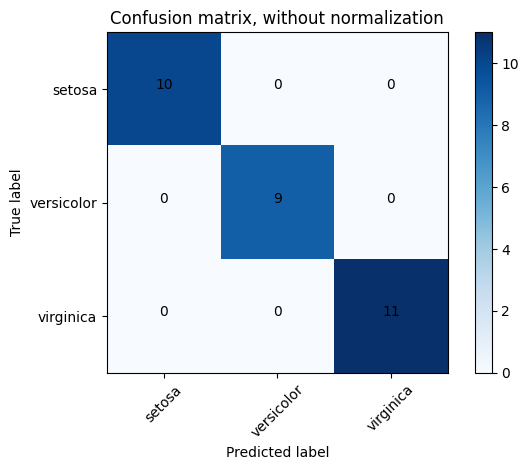

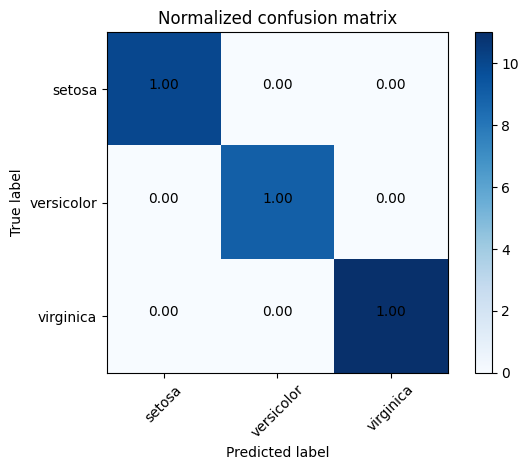

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load a sample dataset (replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (replace this with your own classifier)
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logModel.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with and without normalization
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    plt.figure()
    plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.target_names))
    plt.xticks(tick_marks, data.target_names, rotation=45)
    plt.yticks(tick_marks, data.target_names)

    if normalize is not None:
        confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], '.2f' if normalize else 'd'),
                     horizontalalignment="center", color="black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()


## 3- Neural Network

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense


In [ ]:
# Define model
model = Sequential()
model.add(Dense(16, input_dim=54, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                880       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# Fit Model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 14s 4ms/step - loss: 10759.3213 - accuracy: 0.6874
Epoch 2/5
3452/3452 [==============================] - 9s 3ms/step - loss: 158.3421 - accuracy: 0.7015
Epoch 3/5
3452/3452 [==============================] - 7s 2ms/step - loss: 47.9936 - accuracy: 0.7015
Epoch 4/5
3452/3452 [==============================] - 9s 3ms/step - loss: 20.3668 - accuracy: 0.7015
Epoch 5/5
3452/3452 [==============================] - 7s 2ms/step - loss: 0.6093 - accuracy: 0.7015


## Model evaluation

In [ ]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>= 0.5 else 0   for y in trainPred]

accuracy_score(y_train,trainPred)

3452/3452 [==============================] - 5s 1ms/step


0.7015221347917817

In [ ]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)

y_prediction=[1 if y>= 0.5 else 0   for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 [==============================] - 1s 1ms/step


0.6971387178558494

In [ ]:
confusion_matrix(y_test,y_prediction)

array([[19248,     2],
       [ 8360,     0]])

In [ ]:
f1_score(y_test,y_prediction)

0.0